In [38]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

In [2]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,5,6,5,7], dtype=np.float64)

In [13]:
def best_fit_slope_and_intercept(xs,ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) /
          ((mean(xs)*mean(xs)) - mean(xs*xs)) )
    b = mean(ys) - m*mean(xs) 
    return m, b

In [14]:
m,b = best_fit_slope_and_intercept(xs,ys)
print(m,b)

0.40000000000000047 3.9333333333333313


In [16]:
regression_line = [(m*x)+b for x in xs]
# for x in xs:
#    regression_line.append((m*x)+b)

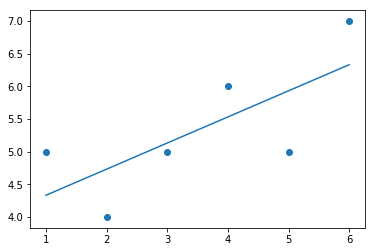

In [18]:
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()

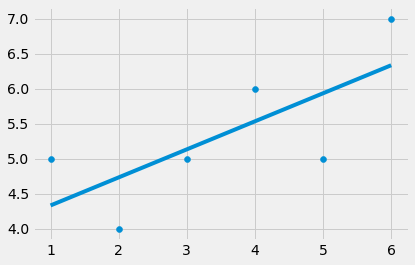

In [21]:
style.use("fivethirtyeight")
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()

In [26]:
predict_x = 8
predict_y = (m*predict_x)+b 

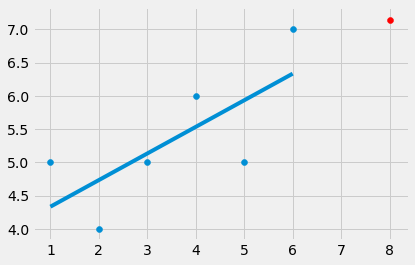

In [28]:
plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y, color="r")
plt.plot(xs, regression_line)
plt.show()

In [29]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

In [36]:
def coefficient_of_determination(ys_orig, ys_line):
    ys_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, ys_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

In [37]:
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.525


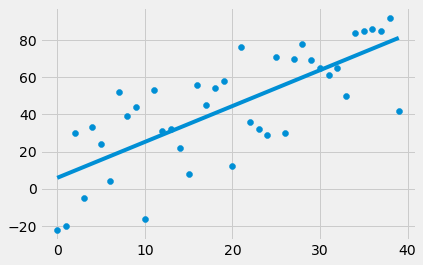

0.5578757472408109


In [44]:
def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == "pos":
            val += step
        elif correlation and correlation == "neg":
            val -= step
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

xs, ys = create_dataset(40, 40, 2, correlation="pos")
m,b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)